# Data Cleaning

In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\chinnu\Documents\PropertyWala.csv")

In [3]:
df=df.dropna()
df.drop("Unnamed: 0",axis=1,inplace=True)
df.reset_index(drop=True)

,area,price,sqFt,sqFt price,Bedrooms,posted date
0,"in Muthangi, Hyderabad",30.5 lakhs,888 SqFeet,3435.0,2 Bedroom,8 hours ago
1,"in Muthangi, Hyderabad",33.88 lakhs,909 SqFeet,3727.0,2 Bedroom,Yesterday
2,"in Kistareddypet, Hyderabad",44.2 lakhs,954 SqFeet,4633.0,2 Bedroom,Yesterday
3,"in Satamrai, Hyderabad",44 lakhs,800 SqFeet,5500.0,2 Bedroom,Yesterday
4,"in Indresham, Hyderabad",35.2 lakhs,977 SqFeet,3603.0,2 Bedroom,Yesterday
...,...,...,...,...,...,...
456,"in Indresham, Hyderabad",44.8 lakhs,1288 SqFeet,3478.0,3 Bedroom,2 days ago
457,"in Muthangi, Hyderabad",32.5 lakhs,906 SqFeet,3587.0,2 Bedroom,2 days ago
458,"in Kistareddypet, Hyderabad",35.18 lakhs,918 SqFeet,3832.0,2 Bedroom,3 days ago
459,"in Kistareddypet, Hyderabad",36.18 lakhs,999 SqFeet,3622.0,2 Bedroom,2 days ago


#Raw data

In [4]:
df["price"]=df["price"].replace(" crores","crore",regex=True)
df["price"]=df["price"].replace(" crore","crore",regex=True)
df["price"]=df["price"].replace(" lakhs","lakh",regex=True)
df["price"]=df["price"].str.replace("lakh","")
df["sqFt"]=df["sqFt"].str.replace("SqFeet","")
df["area"]=df["area"].str.replace("in","")
df["Bedrooms"]=df["Bedrooms"].str.replace("Bedroom","")
df["area"]=df["area"].str.replace("Hyderabad","")
df["area"]=df["area"].replace({',':"",'Candeur Cresent':"",'Gardenia Towers':"",'Cloud 33 ':"",'Prestige Clairemont':"",'Sarovar Zenith ':"",'Aparna Sarovar':"",'Raheja Vistas':"",'One Harmony':"",'Orange Estella':"",'Aditya Athena':"",'Muppas Melody':"",'Nagarjuna Residency':"",'Spaces Ameya':"",' SAS Crown':"",'Poulomi Avante':"",'Team4 Nyla':"",'Hallmark Skyrena':""},regex=True)
df["price"]=df["price"].replace({"crore":"*1e2"},regex=True).map(pd.eval)
df.reset_index(drop=True)

,area,price,sqFt,sqFt price,Bedrooms,posted date
0,Muthangi,30.50,888,3435.0,2,8 hours ago
1,Muthangi,33.88,909,3727.0,2,Yesterday
2,Kistareddypet,44.20,954,4633.0,2,Yesterday
3,Satamrai,44.00,800,5500.0,2,Yesterday
4,Indresham,35.20,977,3603.0,2,Yesterday
...,...,...,...,...,...,...
456,Indresham,44.80,1288,3478.0,3,2 days ago
457,Muthangi,32.50,906,3587.0,2,2 days ago
458,Kistareddypet,35.18,918,3832.0,2,3 days ago
459,Kistareddypet,36.18,999,3622.0,2,2 days ago


##in above data set in these price values are changing crores to crore to converted.
##crore-crore,crore-lakh.
##In these replace the values.

In [14]:
df["area"].unique()


array(['  Muthangi ', '  Kistareddypet ', '  Satamrai ', '  Indresham ',
       '  Attapur ', '  Patelguda ', '  Beeramguda ', '  Gopanapalli ',
       '  Patancheru ', ' Chanda Nagar ', ' Banjara Hills ',
       ' Hitech City ', '  Madhapur ', '  Kukatpally ', '  Kondapur ',
       ' Gaghan Pahad ', ' Vay Iconia Kondapur', '  Tellapur ',
       ' Pacifica Hillcrest Gachibowli', ' Jubilee Hills ',
       '  Manikonda ', '  Narsgi ', '  Somajiguda ', '  Nanakramguda ',
       '  Pocharam ', ' Bandlaguda Jagir ', ' Rajendra Nagar ',
       '  Serilgampally ', '  Ampur ', '  Lgampally', '  Bachupally ',
       '  Kokapet ', ' Bandlaguda Suncity ', '  Hafeezpet ', '  Kompalli',
       '  Kismatpur ', '  Gandipet ', ' KPHB Colony ', '  Yadagirigutta ',
       ' Alkapur Township ', ' Cloud 33 Bachupally', '  Nagole ',
       ' Road area ', '  Isnapur ', '  Kokapet', ' Suchitra Circle ',
       ' Sarovar Zenith Nallagandla', '  Nallagandla', '  Nacharam',
       '  Nallagandla ', ' Pragathi N

In [15]:
df["Bedrooms"].unique()

array(['2 ', '3 ', '4 ', '1 '], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         461 non-null    object
 1   price        461 non-null    int32 
 2   sqFt         461 non-null    int32 
 3   sqFt price   461 non-null    int32 
 4   Bedrooms     461 non-null    object
 5   posted date  461 non-null    object
dtypes: int32(3), object(3)
memory usage: 19.8+ KB


In [17]:
df["price"]=df["price"].astype("int")

In [18]:
df["sqFt"]=df["sqFt"].astype("int")

In [19]:
df["sqFt price"]=df["sqFt price"].astype("int")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         461 non-null    object
 1   price        461 non-null    int32 
 2   sqFt         461 non-null    int32 
 3   sqFt price   461 non-null    int32 
 4   Bedrooms     461 non-null    object
 5   posted date  461 non-null    object
dtypes: int32(3), object(3)
memory usage: 19.8+ KB


(array([333.,  78.,  29.,  11.,   3.,   1.,   2.,   1.,   2.,   1.]),
 array([  3. ,  61.1, 119.2, 177.3, 235.4, 293.5, 351.6, 409.7, 467.8,
        525.9, 584. ]),
 <BarContainer object of 10 artists>)

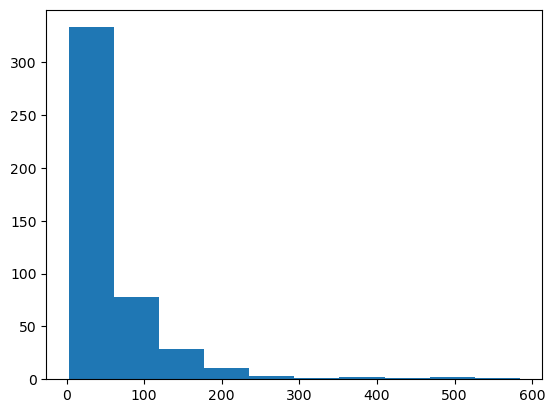

In [21]:
plt.hist(data=df,x="price")

#In the above histogram represent the highest price is available 600 and maximum disribution is 0-50. 


In [22]:
PriceCat=[]
for i in df["price"]:
    if i<50:
        PriceCat.append("Low")
    elif(i>50)&(i<150):
        PriceCat.append("Medium")
    else:
        PriceCat.append("High")
PriceCat

['Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',


In [23]:
df["PriceCat"]=PriceCat

In [24]:
df.rename(columns={"price":"price_lakh"},inplace=True)

In [25]:
df.reset_index(drop=True)

,area,price_lakh,sqFt,sqFt price,Bedrooms,posted date,PriceCat
0,Muthangi,30,888,3435,2,8 hours ago,Low
1,Muthangi,33,909,3727,2,Yesterday,Low
2,Kistareddypet,44,954,4633,2,Yesterday,Low
3,Satamrai,44,800,5500,2,Yesterday,Low
4,Indresham,35,977,3603,2,Yesterday,Low
...,...,...,...,...,...,...,...
456,Indresham,44,1288,3478,3,2 days ago,Low
457,Muthangi,32,906,3587,2,2 days ago,Low
458,Kistareddypet,35,918,3832,2,3 days ago,Low
459,Kistareddypet,36,999,3622,2,2 days ago,Low


#In the above dataset is cleaned data set

In [26]:
df["price_lakh"].min()

3

In [27]:
df["price_lakh"].mean()

65.68980477223427

In [28]:
df["price_lakh"].max()

584

# Visualization

# Histogram

univariate

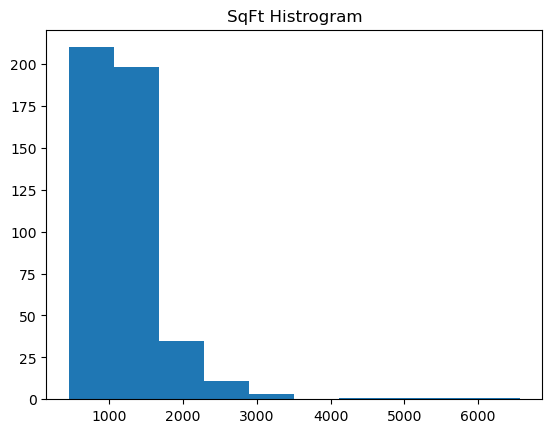

In [66]:
#Numerical
plt.hist(df["sqFt"])
plt.title("SqFt Histrogram")
plt.show()

#In the above histrogram we are representing the Square Feet.



#In the above histrogram highest square feet is availabe 600 and maximum square feet is available to 0-200+

#In below hist plot most of the flats are in 500-1500square feets.

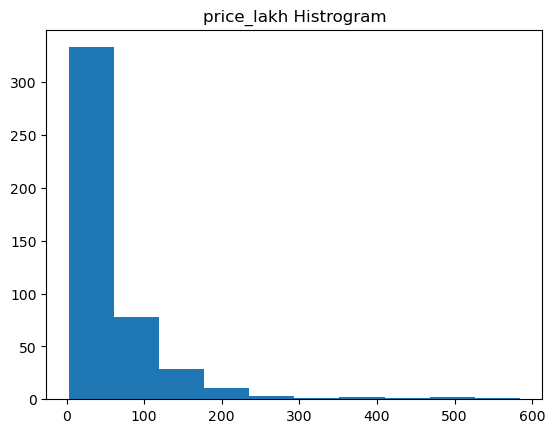

In [67]:
#numerical
plt.hist(df["price_lakh"])
plt.title("price_lakh Histrogram")
plt.show()

#In the above histogram plot the highest price is available in 600 prices.the maximum distribution in between 0-50 prices.



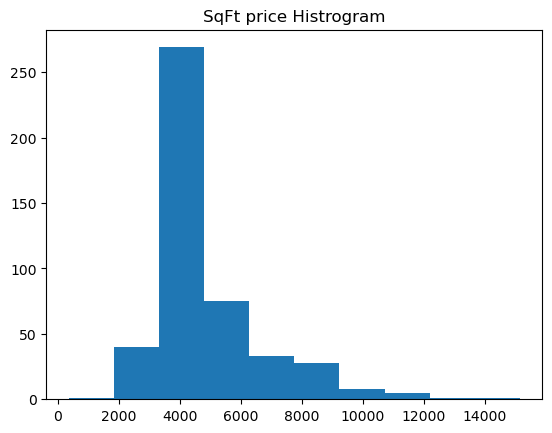

In [68]:
plt.hist(df["sqFt price"])
plt.title("SqFt price Histrogram")
plt.show()


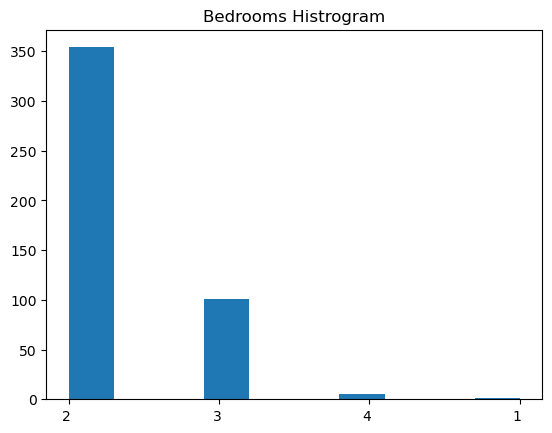

In [69]:
#histogram
plt.hist(df["Bedrooms"])
plt.title("Bedrooms Histrogram")
plt.show()

#This hist plot shows that there 2Bedrooms are high 1Bedroom are low.


#DENSITY PLOT

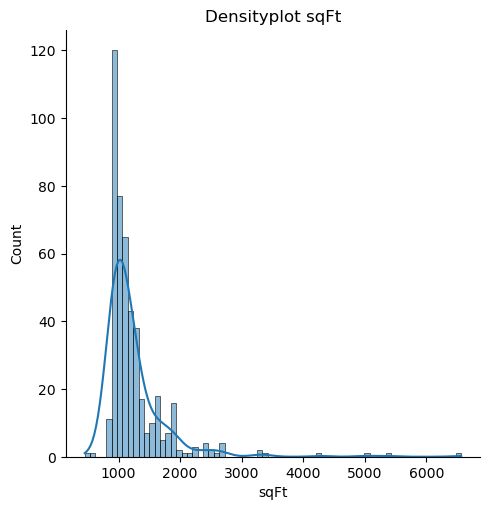

In [70]:
sns.displot(df["sqFt"],kde=True)
plt.title("Densityplot sqFt")
plt.show()

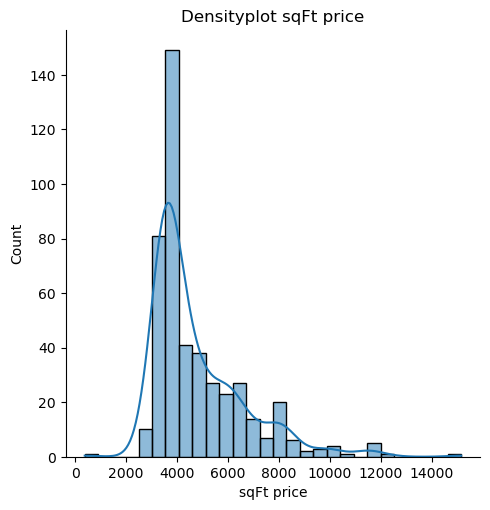

In [71]:
#density plot
sns.displot(df["sqFt price"],kde=True)
plt.title("Densityplot sqFt price")
plt.show()

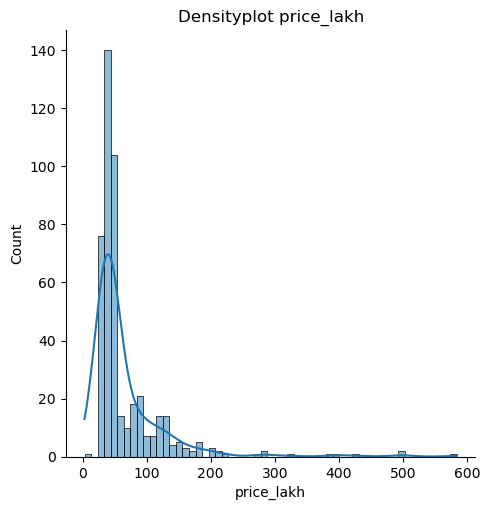

In [72]:
sns.displot(df["price_lakh"],kde=True)
plt.title("Densityplot price_lakh")
plt.show()

#  Barplot 

univariate

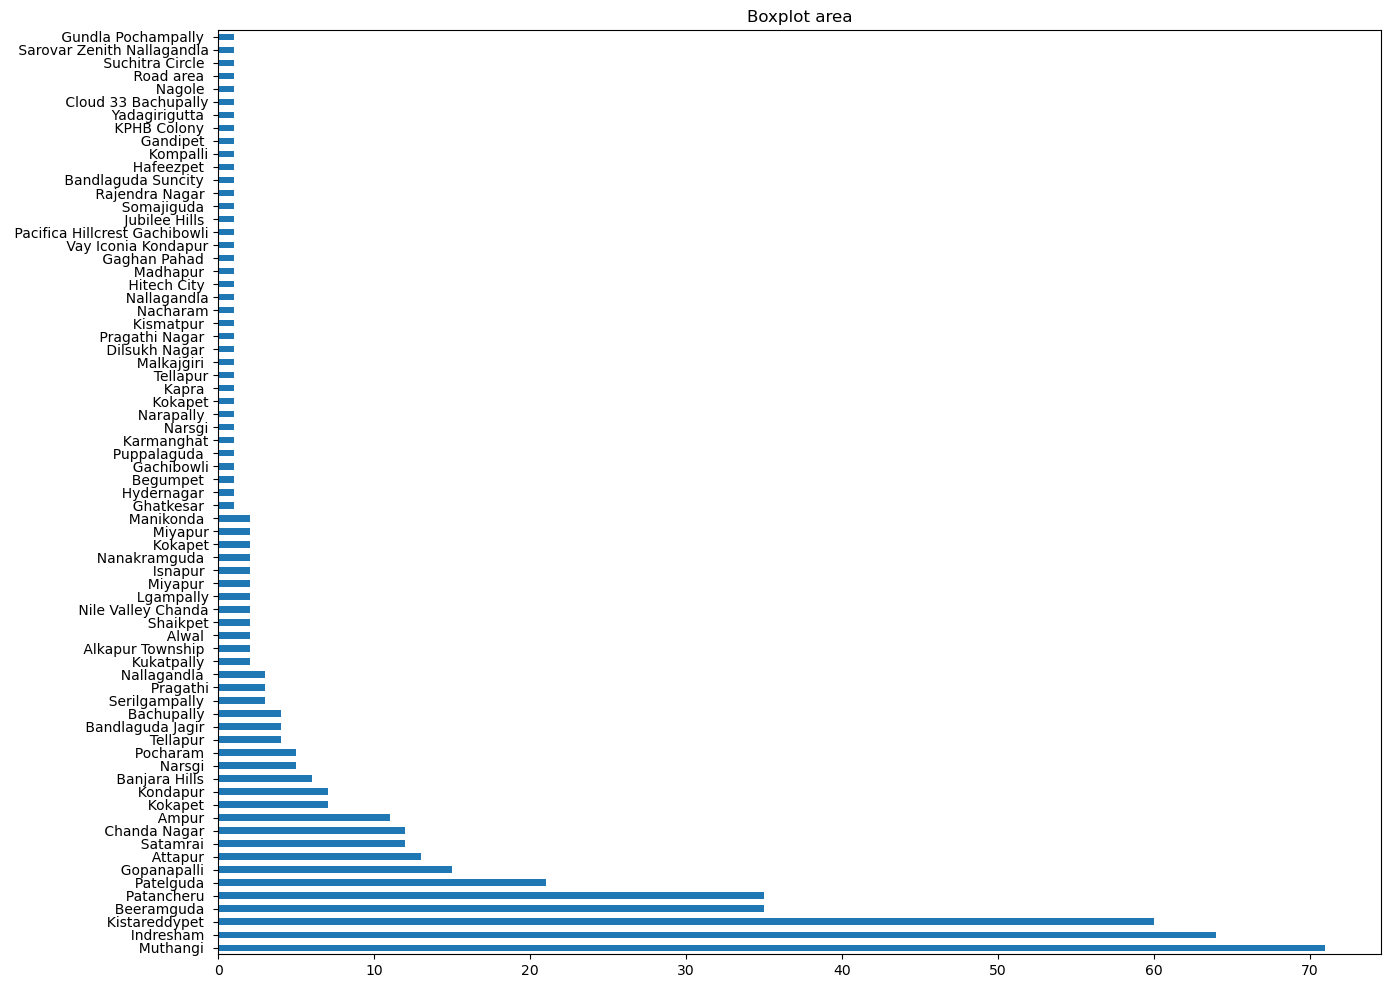

In [73]:
#categorical
df['area'].value_counts().plot(kind='barh',figsize=(15,12))
plt.title("Boxplot area")
plt.show()

#COUNT PLOT

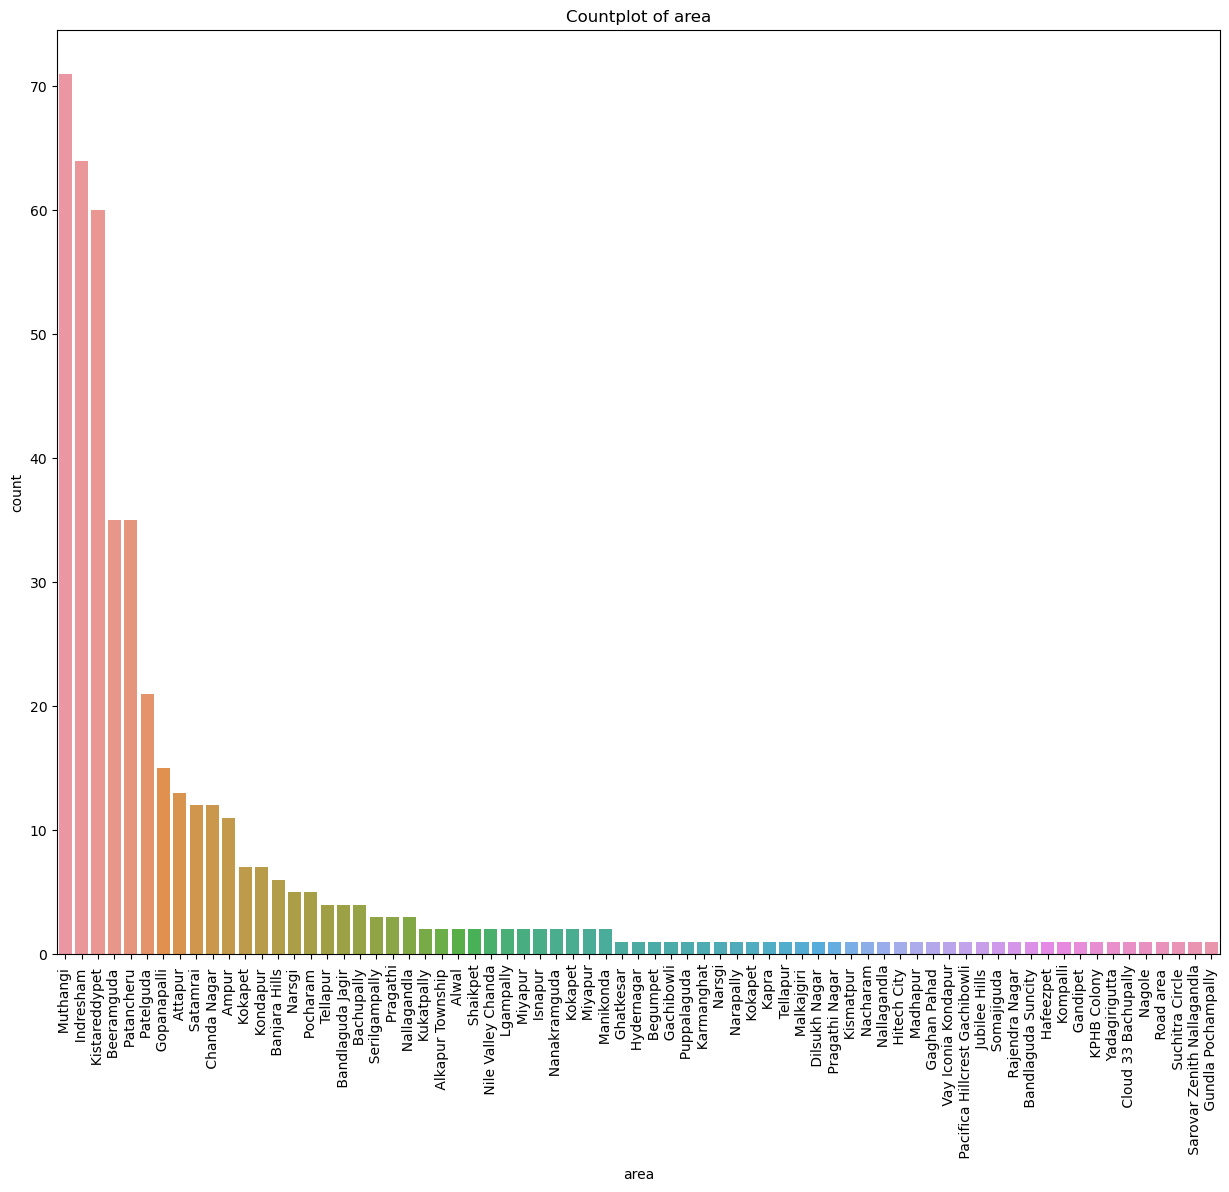

In [74]:
#count plot
plt.figure(figsize=(15,12))
ax=sns.countplot(x="area",data=df,order=df["area"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot of area")
plt.show()


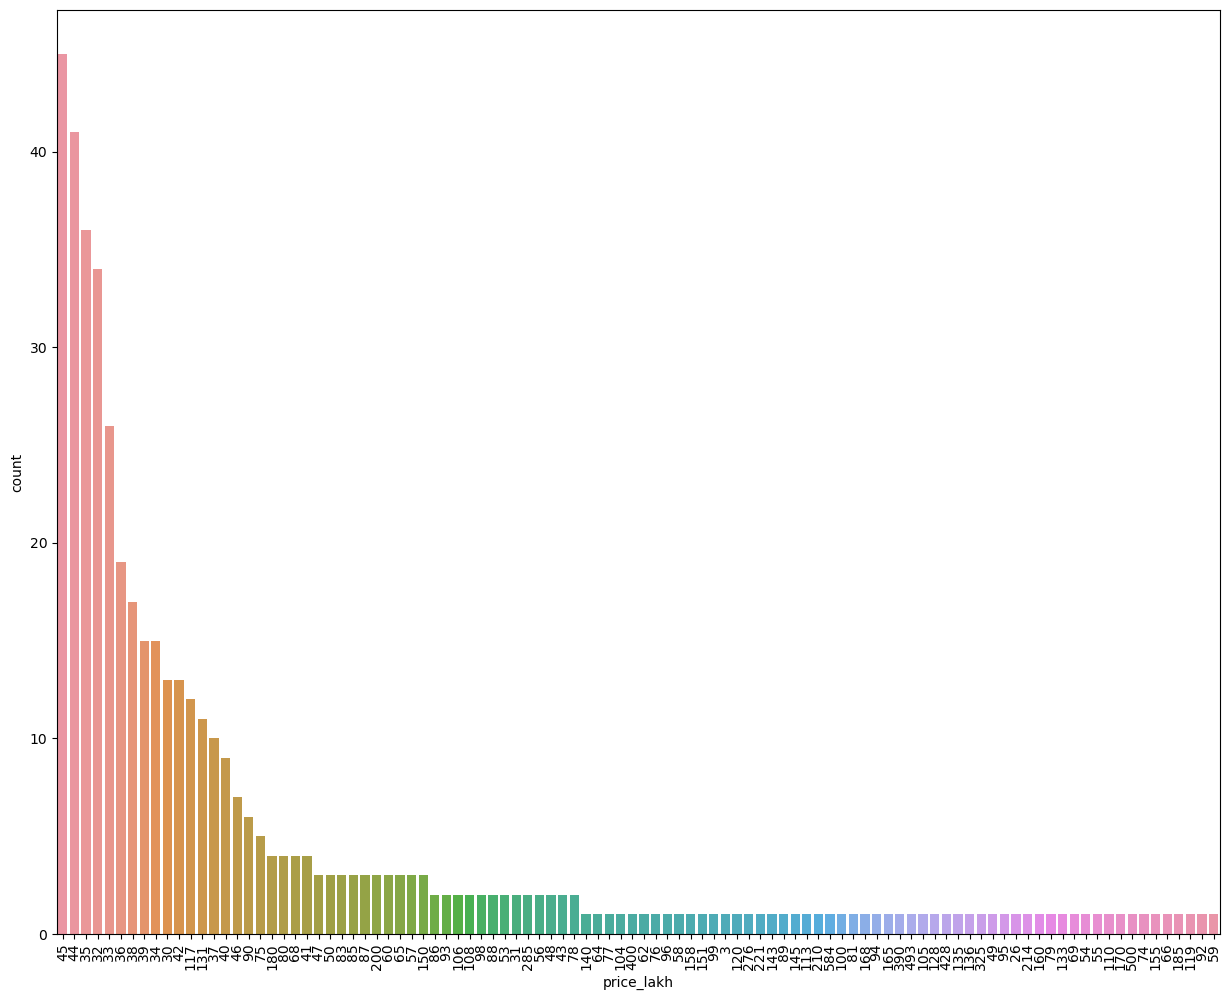

In [75]:
#count plot
plt.figure(figsize=(15,12))
ax=sns.countplot(x="price_lakh",data=df,order=df["price_lakh"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


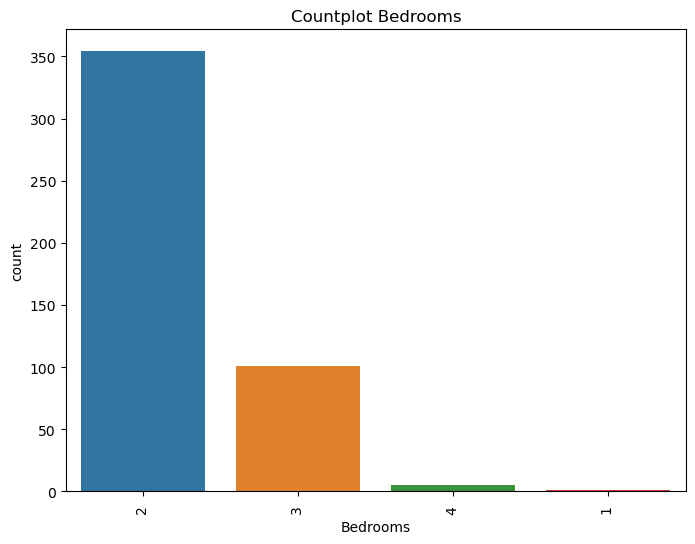

In [76]:
#count plot
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Bedrooms",data=df,order=df["Bedrooms"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot Bedrooms")
plt.show()

# Pie plot

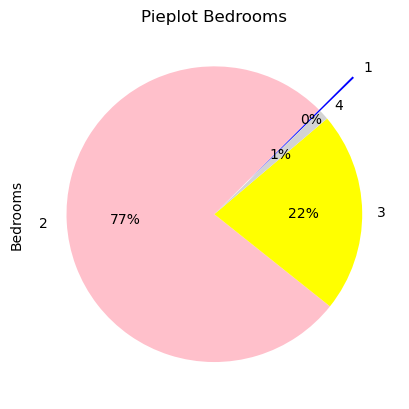

In [77]:
#numerical
#pie chat
#univariate
df['Bedrooms'].value_counts().plot(kind='pie',colors=['pink','yellow','lightgray','blue'], autopct="%.0f%%", startangle=45,explode=[0,0,0,0.32])
plt.title("Pieplot Bedrooms")
plt.show()

#This pie chat shows percentage of bedrooms.

#2Bedrooms has the highest availability of areas, accounting for 77%. 

#1Bedrooms is the lowest bedrooms in area comprising only 0%.

#3Bedrooms is an average availability of area at 22%.

In [78]:
df

,area,price_lakh,sqFt,sqFt price,Bedrooms,posted date,PriceCat
0,Muthangi,30,888,3435,2,8 hours ago,Low
1,Muthangi,33,909,3727,2,Yesterday,Low
3,Kistareddypet,44,954,4633,2,Yesterday,Low
4,Satamrai,44,800,5500,2,Yesterday,Low
5,Indresham,35,977,3603,2,Yesterday,Low
...,...,...,...,...,...,...,...
1245,Indresham,44,1288,3478,3,2 days ago,Low
1246,Muthangi,32,906,3587,2,2 days ago,Low
1247,Kistareddypet,35,918,3832,2,3 days ago,Low
1248,Kistareddypet,36,999,3622,2,2 days ago,Low


Text(0.5, 1.0, 'Pieplot Area vs Price_lakh')

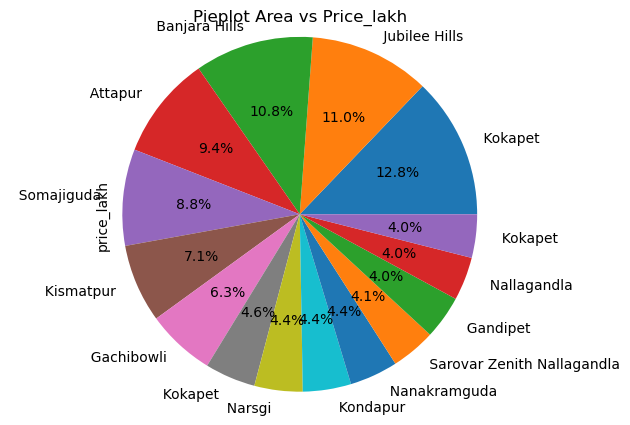

In [79]:
#categorical vs Numerical
df.groupby('area')['price_lakh'].max().sort_values(ascending=False)[:15].plot.pie(autopct="%.1f%%",radius=1.2)
plt.title("Pieplot Area vs Price_lakh")

#This pie chat shows percentage of price on  top 15 areas.


#The price of the area in jubilee hills is high.

# Box plot

Text(0.5, 1.0, 'Boxplot Area vs Price_Lakh')

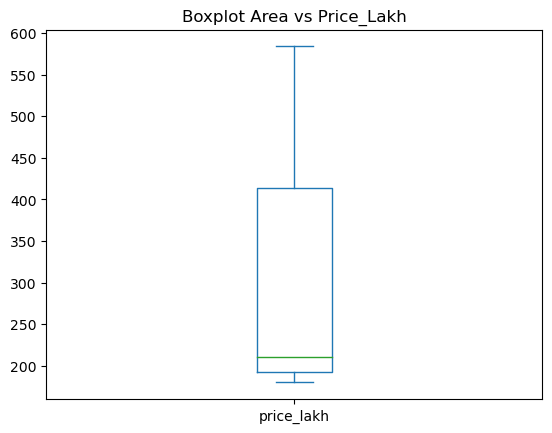

In [81]:
#categorical vs numerical 
#Bax Plot"
df.groupby('area')['price_lakh'].max().sort_values(ascending=False)[:15].plot(kind='box')
plt.title("Boxplot Area vs Price_Lakh")

Text(0.5, 1.0, 'Boxplot Area vs SqFt')

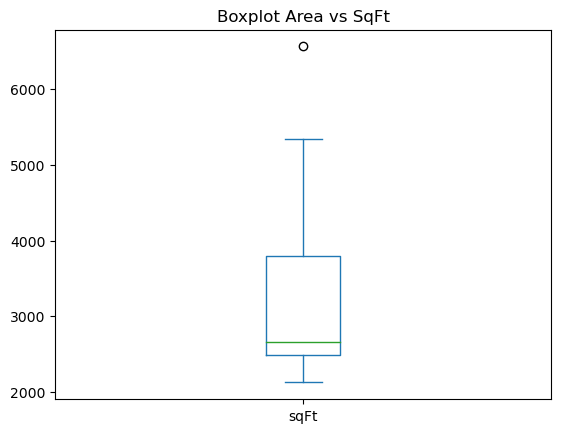

In [82]:
#Categorical vs Numerical
df.groupby('area')['sqFt'].max().sort_values(ascending=False)[:15].plot(kind='box')
plt.title("Boxplot Area vs SqFt")

Text(0.5, 1.0, 'Box SqFt vs SqFt Price')

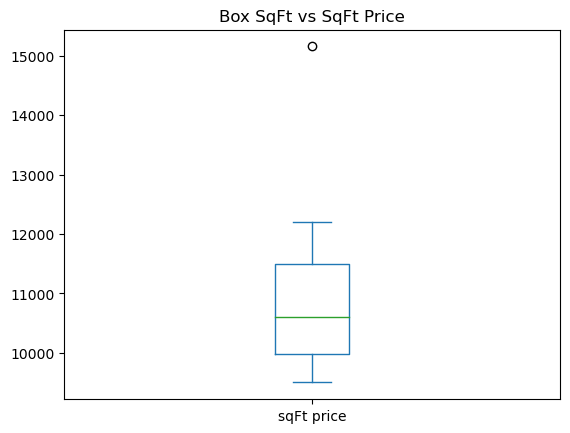

In [83]:
#Numerical vs categorical
df.groupby('sqFt')['sqFt price'].max().sort_values(ascending=False)[:15].plot(kind='box')
plt.title("Box SqFt vs SqFt Price")

Text(0.5, 1.0, 'Barplot Area vs Price_Lakh')

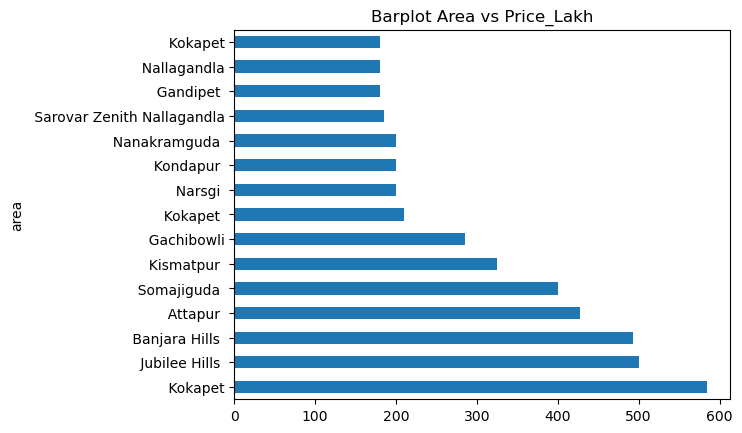

In [84]:
#Categorical vs Numerical 
#Bar plot
df.groupby('area')['price_lakh'].max().sort_values(ascending=False)[:15].plot(kind='barh')
plt.title("Barplot Area vs Price_Lakh")

Text(0.5, 1.0, 'Barplot SqFt vs Price_Lakh')

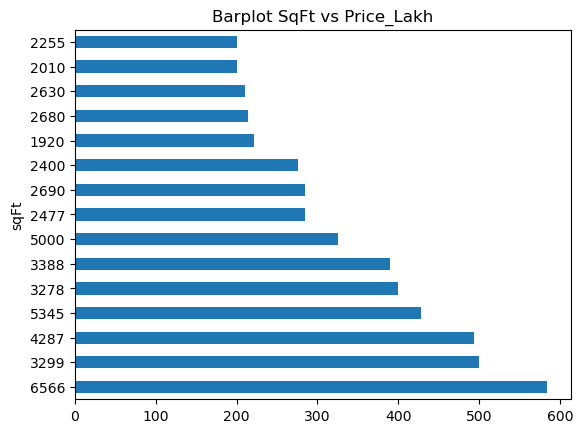

In [85]:
#Numerical vs Numerical
df.groupby('sqFt')['price_lakh'].max().sort_values(ascending=False)[:15].plot(kind='barh')
plt.title("Barplot SqFt vs Price_Lakh")

Text(0.5, 1.0, 'Barplot Bedrooms vs Price_Lakh')

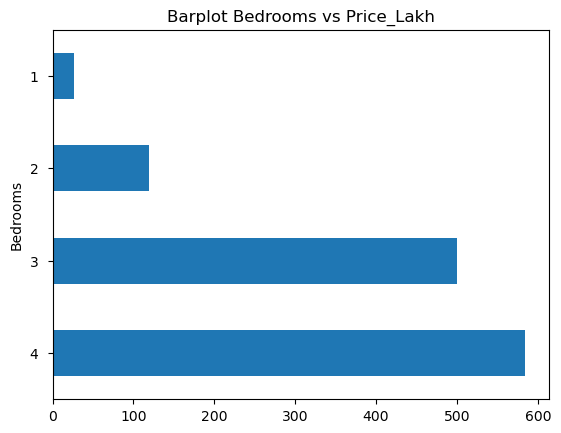

In [86]:
#Numerical vs Numerical
df.groupby('Bedrooms')['price_lakh'].max().sort_values(ascending=False)[:15].plot(kind='barh')
plt.title("Barplot Bedrooms vs Price_Lakh")

Text(0.5, 1.0, 'Boxplot of area')

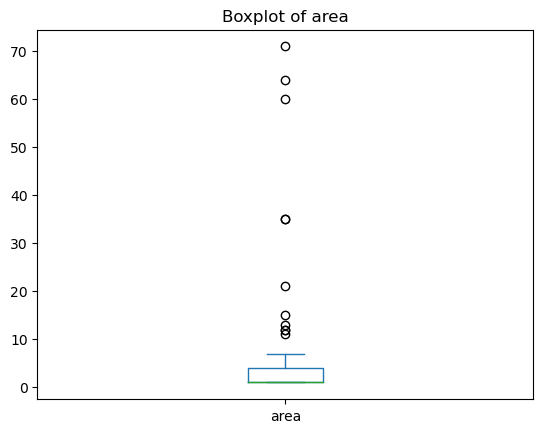

In [88]:
#Categorical
#Bax Plot"
df["area"].value_counts().plot(kind="box")
plt.title("Boxplot of area")

Text(0.5, 1.0, 'Boxplot price_lakh')

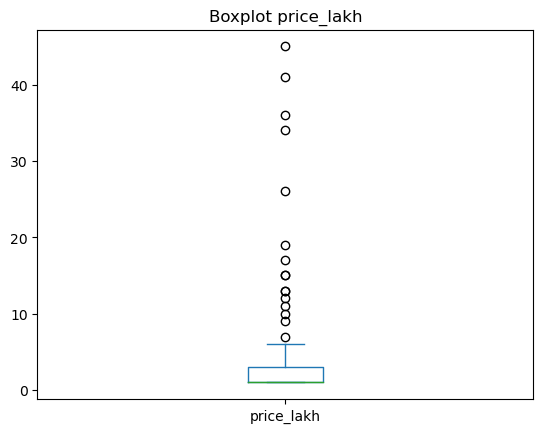

In [89]:
df["price_lakh"].value_counts().plot(kind="box")
plt.title("Boxplot price_lakh")

# Scatterplot

#Numerical vs Numerical

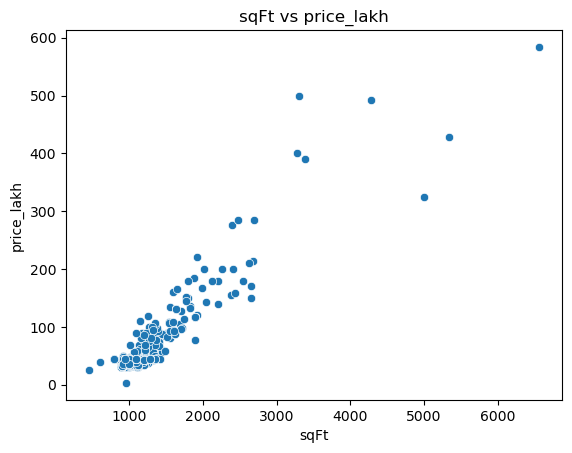

In [90]:
plt.title("sqFt vs price_lakh")
sns.scatterplot(x=df["sqFt"],y=df["price_lakh"])
plt.xlabel("sqFt")
plt.ylabel("price_lakh")
plt.show()

#Scatter plot shows that most flats sqft is about  and the price is between 100 to 300.


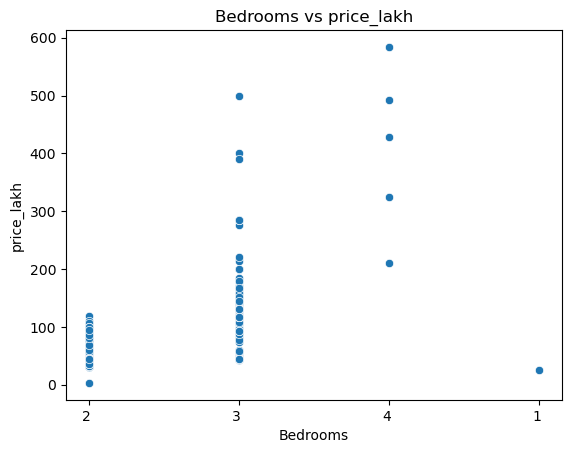

In [91]:
plt.title("Bedrooms vs price_lakh")
sns.scatterplot(x=df["Bedrooms"],y=df["price_lakh"])
plt.xlabel("Bedrooms")
plt.ylabel("price_lakh")
plt.show()

#Scatter plot shows that 3Bedrooms and 4Bedrooms are more  and the price is up to 600.


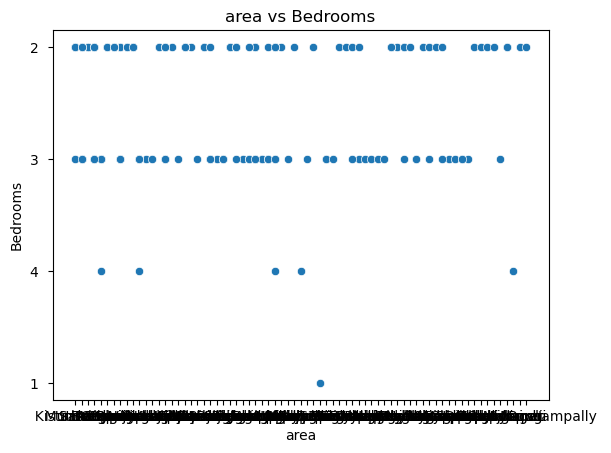

In [99]:
plt.title("area vs Bedrooms")
sns.scatterplot(x=df["area"],y=df["Bedrooms"])
top_indices = df[:15]
plt.xlabel("area")
plt.ylabel("Bedrooms")
plt.show()

In [102]:
df['area'].unique().shape

(71,)

In [100]:
df['Bedrooms'].unique()

array(['2 ', '3 ', '4 ', '1 '], dtype=object)

# Density plot

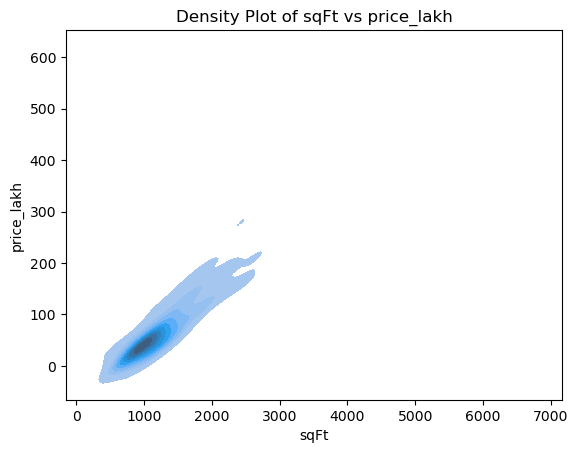

In [92]:
#density Plot
#Univariate
#Numerical vs Numerical
sns.kdeplot(data=df, x='sqFt', y='price_lakh', fill=True)
plt.xlabel("sqFt")
plt.ylabel("price_lakh")
plt.title("Density Plot of sqFt vs price_lakh")
plt.show()

C:\Users\chinnu\AppData\Local\Temp\ipykernel_23060\2023629945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f")


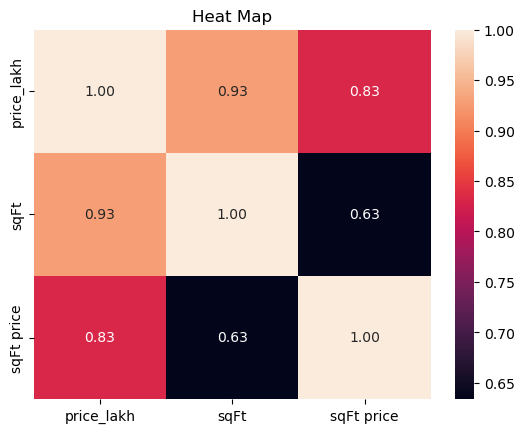

In [93]:
#heat map
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Heat Map")
plt.show()

#In my dataset there the diagonal line shows strong relation.


#There is no significant relationship between columns.

#All are positive , so we can analyze that there are few points where the correlation between two columns are paritially in relation.

#Heat map represents the correlation between Price, Square feet and Square feet price.

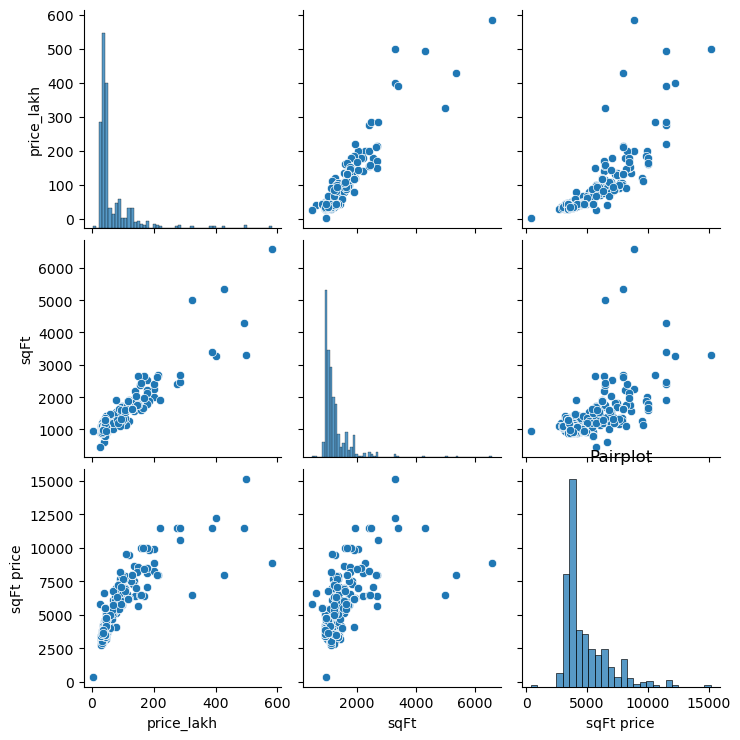

In [94]:
#pair plot
sns.pairplot(df)
plt.title("Pairplot")
plt.show()


#In the above pair plot represent the correlation 

#From the Pair Plot we can describe completely about price , square feet , square feet price with related to area.